In [1]:
import input_data
import tensorflow as tf
import numpy as np
import copy
from nnS_lib import *

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
sess = tf.InteractiveSession()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
x  = tf.placeholder("float", shape=[None, 784])
y_ = tf.placeholder("float", shape=[None, 10])

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

sess.run(tf.initialize_all_variables())
y = tf.nn.softmax(tf.matmul(x,W) + b)
cross_entropy = -tf.reduce_sum(y_*tf.log(y))

In [3]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
for i in range(1000):
    batch = mnist.train.next_batch(50)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

In [4]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
acc_full = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})

In [5]:
# For interfacing with Matlab
# np.savetxt("Wval.csv", Wval, delimiter=",")
# W_app_val = np.loadtxt("Wval_approx.csv", delimiter=',')

In [6]:
Wval = W.eval()
AccFin = []
for k in range(0,101,5):
    p = k/100.0
    W_app_val = dropLow(Wval,p)
    assign_op = W.assign(W_app_val)
    sess.run(assign_op)
    acc_final = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})
    AccFin.append(acc_final)
    #print(p, acc_full, acc_final)

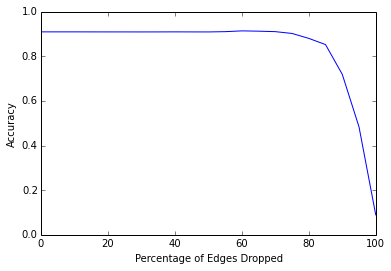

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()

plt.plot(range(0,101,5), AccFin)
plt.ylabel('Accuracy')
plt.xlabel('Percentage of Edges Dropped')